### What to do?
- split columns into date/time format
- transform date into datetime type
- if there is some dublicates, they should be deleted
- count the length of freeze by subtractint first day from the last one

##### As usual install some packages

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import array, newaxis

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

###### Unload some data about freeze

In [3]:
freeze_train = pd.read_csv('C://Users//Julia//Desktop//WorldClass//December//Freeze.csv',encoding = 'cp1251')
freeze_test = pd.read_csv('C://Users//Julia//Desktop//WorldClass//March//Freeze.csv',encoding = 'cp1251')

In [247]:
freeze_train['Test'] = False
freeze_test['Test'] = True

In [248]:
freeze_data = pd.concat([freeze_test, freeze_train], ignore_index = True)

In [249]:
freeze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135991 entries, 0 to 135990
Data columns (total 4 columns):
КодКонтракта     135991 non-null int64
ДатаНачала       135985 non-null object
ДатаОкончания    135991 non-null object
Test             135991 non-null bool
dtypes: bool(1), int64(1), object(2)
memory usage: 4.3+ MB


In [250]:
freeze_data.isnull().sum()

КодКонтракта     0
ДатаНачала       6
ДатаОкончания    0
Test             0
dtype: int64

In [251]:
freeze_data.duplicated().sum()

91

In [252]:
freeze_data.Test.value_counts()

True     83893
False    52098
Name: Test, dtype: int64

In [253]:
no_test_col = freeze_data[['КодКонтракта', 'ДатаНачала','ДатаОкончания']]

In [254]:
clear_freeze = freeze_data.drop_duplicates(no_test_col,"last")

In [255]:
clear_freeze.duplicated().sum()

0

In [256]:
clear_freeze.Test.value_counts()

False    52054
True     32183
Name: Test, dtype: int64

In [257]:
clear_freeze.head()

,КодКонтракта,ДатаНачала,ДатаОкончания,Test
25,7657,27.12.2015,13.01.2016 23:59:59,True
26,7657,18.02.2016,28.02.2016 23:59:59,True
28,7658,25.12.2015,08.01.2016 23:59:59,True
35,7661,09.12.2015,26.12.2015 23:59:59,True
43,7674,27.12.2015,07.01.2016 23:59:59,True


In [258]:
lastday_freeze = pd.DataFrame(clear_freeze.ДатаОкончания.str.split().str[0])

In [259]:
lastday_freeze.head()

,0
25,13.01.2016
26,28.02.2016
28,08.01.2016
35,26.12.2015
43,07.01.2016


In [260]:
clear_freeze['lastday_freeze'] = lastday_freeze

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [261]:
clear_freeze['lastday_freeze'] = pd.to_datetime(clear_freeze['lastday_freeze'], format='%d.%m.%Y')

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [262]:
clear_freeze.head()

,КодКонтракта,ДатаНачала,ДатаОкончания,Test,lastday_freeze
25,7657,27.12.2015,13.01.2016 23:59:59,True,2016-01-13
26,7657,18.02.2016,28.02.2016 23:59:59,True,2016-02-28
28,7658,25.12.2015,08.01.2016 23:59:59,True,2016-01-08
35,7661,09.12.2015,26.12.2015 23:59:59,True,2015-12-26
43,7674,27.12.2015,07.01.2016 23:59:59,True,2016-01-07


In [263]:
clear_freeze['first_freeze'] = pd.to_datetime(clear_freeze['ДатаНачала'], format='%d.%m.%Y')

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [264]:
clear_freeze.head()

,КодКонтракта,ДатаНачала,ДатаОкончания,Test,lastday_freeze,first_freeze
25,7657,27.12.2015,13.01.2016 23:59:59,True,2016-01-13,2015-12-27
26,7657,18.02.2016,28.02.2016 23:59:59,True,2016-02-28,2016-02-18
28,7658,25.12.2015,08.01.2016 23:59:59,True,2016-01-08,2015-12-25
35,7661,09.12.2015,26.12.2015 23:59:59,True,2015-12-26,2015-12-09
43,7674,27.12.2015,07.01.2016 23:59:59,True,2016-01-07,2015-12-27


In [265]:
clear_freeze =  clear_freeze.dropna()

In [266]:
clear_freeze.isnull().sum()

КодКонтракта      0
ДатаНачала        0
ДатаОкончания     0
Test              0
lastday_freeze    0
first_freeze      0
dtype: int64

In [267]:
days_of_freeze = clear_freeze["lastday_freeze"] - clear_freeze["first_freeze"]

In [268]:
clear_freeze['days_of_freeze'] = days_of_freeze

In [269]:
clear_freeze.head()

,КодКонтракта,ДатаНачала,ДатаОкончания,Test,lastday_freeze,first_freeze,days_of_freeze
25,7657,27.12.2015,13.01.2016 23:59:59,True,2016-01-13,2015-12-27,17 days
26,7657,18.02.2016,28.02.2016 23:59:59,True,2016-02-28,2016-02-18,10 days
28,7658,25.12.2015,08.01.2016 23:59:59,True,2016-01-08,2015-12-25,14 days
35,7661,09.12.2015,26.12.2015 23:59:59,True,2015-12-26,2015-12-09,17 days
43,7674,27.12.2015,07.01.2016 23:59:59,True,2016-01-07,2015-12-27,11 days


#### Adding season component

In [270]:
clear_freeze['first_month'] = clear_freeze.first_freeze.apply(lambda x: x.month)

In [271]:
clear_freeze.head()

,КодКонтракта,ДатаНачала,ДатаОкончания,Test,lastday_freeze,first_freeze,days_of_freeze,first_month
25,7657,27.12.2015,13.01.2016 23:59:59,True,2016-01-13,2015-12-27,17 days,12
26,7657,18.02.2016,28.02.2016 23:59:59,True,2016-02-28,2016-02-18,10 days,2
28,7658,25.12.2015,08.01.2016 23:59:59,True,2016-01-08,2015-12-25,14 days,12
35,7661,09.12.2015,26.12.2015 23:59:59,True,2015-12-26,2015-12-09,17 days,12
43,7674,27.12.2015,07.01.2016 23:59:59,True,2016-01-07,2015-12-27,11 days,12


In [272]:
def get_season(month):
    if month <= 2 or month==12:
        season = 0
    elif 2<month<=5:
        season = 1
    elif 5<month<=8:
        season = 2
    else:
        season = 3
    return season

In [273]:
for month in clear_freeze.first_month.unique():
    clear_freeze.loc[clear_freeze.index[clear_freeze.first_month==month], 'Season_freeze'] = get_season(month)

In [274]:
clear_freeze.Season_freeze.value_counts()

0    31439
2    27616
3    24256
1      923
Name: Season_freeze, dtype: int64

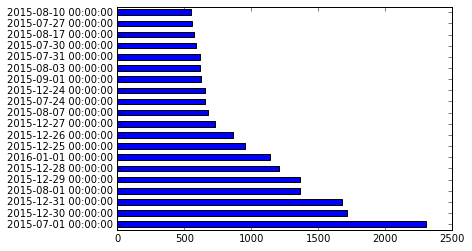

In [275]:
% %matplotlib inline
clear_freeze.first_freeze.value_counts()[:20].plot(kind='barh')

In [276]:
contracts = pd.read_pickle('C://Users//Julia//Desktop//WorldClass//dima.pkl')

In [277]:
contracts.head()

,КодКлиента,КодКонтракта,КодНоменклатуры,ДатаНачалаСрокаДействия,ДатаОкончанияСрокаДействия,ВидСтажаНаНачалоМесяца,ВидСтажаВМоментПриобретения,ВидДоговора,БонусыОстаток,ДлительностьКонтракта,...,Cont_length,beg_month,beg_day,Season,age_group,club_segment,bought_freeze,bonus_left,contr_type,nom_lev
0,3101,29908,36109,21.11.2014,20.12.2015,Renew,Renew,other,390,365,...,394,11,21,3,2,1,0,390,0,5
1,3120,28457,99,26.06.2015,24.12.2015,Renew,Ex,other,645.14,182,...,181,6,26,2,2,1,0,645.14,0,1
2,3126,8230,99,29.10.2014,27.12.2015,Renew,Renew,other,6 275.96,395,...,424,10,29,3,2,3,0,6275.96,0,1
3,3153,8121,99,02.12.2014,15.12.2015,Renew,Renew,other,0.72,365,...,378,12,2,0,2,3,0,0.72,0,1
4,3156,29730,36109,16.11.2014,11.12.2015,Renew,Renew,other,520,365,...,390,11,16,3,2,1,0,520,0,5


In [278]:
grouped = clear_freeze['days_of_freeze'].groupby([clear_freeze['КодКонтракта'],clear_freeze['Test'],clear_freeze['Season_freeze']]).sum()

In [279]:
pd.DataFrame(grouped).head(100)

days_of_freeze
КодКонтракта Test  Season_freeze                
100          False 3                      6 days
7558         False 3                     11 days
7559         False 2                     88 days
                   3                     58 days
7588         False 0                     59 days
                   2                     59 days
7589         False 2                     17 days
                   3                      7 days
7590         False 2                     14 days
7599         False 1                     89 days
                   2                     89 days
7601         False 2                     16 days
                   3                     16 days
7605         False 1                     24 days
                   2                     24 days
7617         False 2                     45 days
7631         False 2                     13 days
7639         False 2                     16 days
7644         False 2                     23 days
7650         False 2                     19 days
7657         False 2                     26 days
             True  0                     27 days
7658         False 2                     17 days
             True  0                     14 days
7659         False 2                     59 days
7660         False 2                     73 days
7661         False 2                     15 days
                   3                     16 days
             True  0                     17 days
7662         False 2                     10 days
...                                          ...
7747         False 1                     59 days
                   2                     59 days
7760         False 2                     61 days
7762         False 2                     29 days
7775         False 2                     29 days
7778         False 3                     14 days
7782         False 2                     29 days
7783         False 2                     29 days
7785         False 2                     24 days
7812         False 2                      6 days
                   3                      7 days
7825         False 2                     80 days
7828         False 2                      8 days
7834         False 2                     12 days
                   3                     18 days
7835         False 3                      8 days
7836         False 2                     29 days
7837         False 1                     89 days
7838         False 1                    243 days
7846         False 2                     16 days
             True  0                     16 days
7855         True  0                     13 days
7861         False 2                      8 days
7862         False 2                      8 days
7863         False 2                     15 days
                   3                     11 days
7870         False 3                     31 days
7871         False 2                      6 days
                   3                     18 days
             True  0                      6 days

[100 rows x 1 columns]

In [280]:
clear_freeze[clear_freeze['КодКонтракта'] == 7661]

,КодКонтракта,ДатаНачала,ДатаОкончания,Test,lastday_freeze,first_freeze,days_of_freeze,first_month,Season_freeze
35,7661,09.12.2015,26.12.2015 23:59:59,True,2015-12-26,2015-12-09,17 days,12,0
83922,7661,10.08.2015,25.08.2015 23:59:59,False,2015-08-25,2015-08-10,15 days,8,2
83923,7661,09.11.2015,15.11.2015 23:59:59,False,2015-11-15,2015-11-09,6 days,11,3
83924,7661,25.11.2015,05.12.2015 23:59:59,False,2015-12-05,2015-11-25,10 days,11,3


In [281]:
count = 0
contr_good = []
from_contracts = contracts.КодКонтракта.unique()
for cont in clear_freeze.КодКонтракта.unique():
    if cont in from_contracts:
        count += 1
        contr_good.append(cont)
print(count)

7787


In [282]:
len(clear_freeze.КодКонтракта.unique())

53795

In [283]:
boolean = clear_freeze.КодКонтракта.apply(lambda x: x in contr_good)

In [284]:
clear_clear_freeze = clear_freeze[boolean]

In [285]:
len(clear_clear_freeze.КодКонтракта.unique())

7787

In [286]:
clear_clear_freeze.head()

,КодКонтракта,ДатаНачала,ДатаОкончания,Test,lastday_freeze,first_freeze,days_of_freeze,first_month,Season_freeze
35,7661,09.12.2015,26.12.2015 23:59:59,True,2015-12-26,2015-12-09,17 days,12,0
43,7674,27.12.2015,07.01.2016 23:59:59,True,2016-01-07,2015-12-27,11 days,12,0
50,7690,20.12.2015,07.01.2016 23:59:59,True,2016-01-07,2015-12-20,18 days,12,0
83,7737,06.12.2015,13.12.2015 23:59:59,True,2015-12-13,2015-12-06,7 days,12,0
108,7846,30.12.2015,15.01.2016 23:59:59,True,2016-01-15,2015-12-30,16 days,12,0


In [287]:
clear_clear_freeze['Test_new'] = clear_clear_freeze.КодКонтракта.apply(lambda x: int(contracts.Test[contracts.КодКонтракта == x] ))

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [288]:
clear_clear_freeze.head(15)

,КодКонтракта,ДатаНачала,ДатаОкончания,Test,lastday_freeze,first_freeze,days_of_freeze,first_month,Season_freeze,Test_new
35,7661,09.12.2015,26.12.2015 23:59:59,True,2015-12-26,2015-12-09,17 days,12,0,1
43,7674,27.12.2015,07.01.2016 23:59:59,True,2016-01-07,2015-12-27,11 days,12,0,1
50,7690,20.12.2015,07.01.2016 23:59:59,True,2016-01-07,2015-12-20,18 days,12,0,1
83,7737,06.12.2015,13.12.2015 23:59:59,True,2015-12-13,2015-12-06,7 days,12,0,0
108,7846,30.12.2015,15.01.2016 23:59:59,True,2016-01-15,2015-12-30,16 days,12,0,1
145,7921,11.01.2016,19.01.2016 23:59:59,True,2016-01-19,2016-01-11,8 days,1,0,1
245,8151,18.12.2015,24.12.2015 23:59:59,True,2015-12-24,2015-12-18,6 days,12,0,0
247,8153,25.12.2015,12.01.2016 23:59:59,True,2016-01-12,2015-12-25,18 days,12,0,1
332,8312,03.12.2015,09.12.2015 23:59:59,True,2015-12-09,2015-12-03,6 days,12,0,1
355,8351,27.12.2015,15.01.2016 23:59:59,True,2016-01-15,2015-12-27,19 days,12,0,1


In [289]:
clear_clear_freeze.drop(["Test"], axis = 1, inplace = True)

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [290]:
clear_clear_freeze['Test']= clear_clear_freeze['Test_new'].astype(bool)

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [291]:
clear_clear_freeze.drop(["Test_new"], axis = 1, inplace = True)

C:\Users\Julia\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [292]:
clear_clear_freeze.head()

,КодКонтракта,ДатаНачала,ДатаОкончания,lastday_freeze,first_freeze,days_of_freeze,first_month,Season_freeze,Test
35,7661,09.12.2015,26.12.2015 23:59:59,2015-12-26,2015-12-09,17 days,12,0,True
43,7674,27.12.2015,07.01.2016 23:59:59,2016-01-07,2015-12-27,11 days,12,0,True
50,7690,20.12.2015,07.01.2016 23:59:59,2016-01-07,2015-12-20,18 days,12,0,True
83,7737,06.12.2015,13.12.2015 23:59:59,2015-12-13,2015-12-06,7 days,12,0,False
108,7846,30.12.2015,15.01.2016 23:59:59,2016-01-15,2015-12-30,16 days,12,0,True


In [293]:
grouped = clear_clear_freeze['days_of_freeze'].groupby([clear_clear_freeze['КодКонтракта'],clear_clear_freeze['Test'],clear_clear_freeze['Season_freeze'],
                                                        clear_clear_freeze['first_month']]).sum()

In [294]:
new_freeze = pd.DataFrame(grouped.reset_index())

In [295]:
new_freeze.head()

,КодКонтракта,Test,Season_freeze,first_month,days_of_freeze
0,7601,False,2,8,16 days
1,7601,False,3,9,10 days
2,7601,False,3,10,6 days
3,7605,False,1,5,24 days
4,7605,False,2,7,24 days


In [296]:
len(new_freeze)

11266

In [297]:
data = pd.DataFrame()

In [298]:
new_freeze.loc[0, 'days_of_freeze'].days

16

In [299]:

for row in range(0, len(new_freeze)):
    if new_freeze.loc[row, 'Season_freeze'] == 2:
        data.loc[row, "Summer"] = new_freeze.loc[row, 'days_of_freeze'].days
        data.loc[row, "Winter"] = 0
        data.loc[row, "Spring"] = 0
        data.loc[row, "Autumn"] = 0
    elif new_freeze.loc[row, 'Season_freeze'] == 0:
        data.loc[row, "Winter"] = new_freeze.loc[row, 'days_of_freeze'].days
        data.loc[row, "Summer"] = 0
        data.loc[row, "Spring"] = 0
        data.loc[row, "Autumn"] = 0
    elif new_freeze.loc[row, 'Season_freeze'] == 1:
        data.loc[row, "Spring"] = new_freeze.loc[row, 'days_of_freeze'].days
        data.loc[row, "Summer"] = 0
        data.loc[row, "Winter"] = 0
        data.loc[row, "Autumn"] = 0
    else:
        data.loc[row, "Autumn"] = new_freeze.loc[row, 'days_of_freeze'].days
        data.loc[row, "Summer"] = 0
        data.loc[row, "Winter"] = 0
        data.loc[row, "Spring"] = 0
    

In [300]:
data.head()

,Summer,Winter,Spring,Autumn
0,16,0,0,0
1,0,0,0,10
2,0,0,0,6
3,0,0,24,0
4,24,0,0,0


In [301]:
len(data)

11266

In [302]:
len(new_freeze)

11266

Соединяем два дата фрейма

In [305]:
final_freeze = new_freeze

In [306]:
final_freeze['Summer'] = data['Summer']
final_freeze['Winter'] = data['Winter']
final_freeze['Autumn'] = data['Autumn']
final_freeze['Spring'] = data['Spring']

In [307]:
final_freeze.head(10)

,КодКонтракта,Test,Season_freeze,first_month,days_of_freeze,Summer,Winter,Autumn,Spring
0,7601,False,2,8,16 days,16,0,0,0
1,7601,False,3,9,10 days,0,0,10,0
2,7601,False,3,10,6 days,0,0,6,0
3,7605,False,1,5,24 days,0,0,0,24
4,7605,False,2,7,24 days,24,0,0,0
5,7639,False,2,7,16 days,16,0,0,0
6,7661,True,0,12,17 days,0,17,0,0
7,7661,True,2,8,15 days,15,0,0,0
8,7661,True,3,11,16 days,0,0,16,0
9,7662,False,2,8,10 days,10,0,0,0


In [309]:
final_freeze.drop([])

16

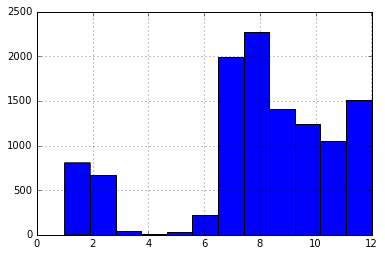

In [311]:
final_freeze.first_month.hist(bins = 12)

In [322]:
final_freeze.drop(['Season_freeze'], axis=1, inplace = True)

In [330]:
final_freeze.drop(['first_month'], axis=1, inplace = True)

In [335]:
final_freeze.head()

,КодКонтракта,Test,days_of_freeze,Summer,Winter,Autumn,Spring
0,7601,False,16 days,16,0,0,0
1,7601,False,10 days,0,0,10,0
2,7601,False,6 days,0,0,6,0
3,7605,False,24 days,0,0,0,24
4,7605,False,24 days,24,0,0,0


In [331]:
grouped = final_freeze.groupby([final_freeze['КодКонтракта']]).sum()

In [332]:
grouped.Test = grouped.Test > 0 

In [ ]:
very_last_freeze = pd.DataFrame(grouped.reset_index())

In [355]:
very_last_freeze.head()

,КодКонтракта,Test,Summer,Winter,Autumn,Spring
0,7601,False,16,0,16,0
1,7605,False,24,0,0,24
2,7639,False,16,0,0,0
3,7661,True,15,17,16,0
4,7662,False,10,0,10,0


In [353]:
len(grouped)== len(final_freeze.КодКонтракта.unique())

True

In [356]:
very_last_freeze.to_pickle('C://Users//Julia//Desktop//WorldClass//final_freeze.pkl')